### Step by step rule for KNN:

1. Choose the number of K, commonly 5
2. Take the nearest K neighbors according to the Euclidean distance
3. Among the K neighbors, count the number of data points in each category
4. Assign the new data point to the category where you counted the most neihbors

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

% matplotlib inline

In [5]:
data = pd.read_csv('Social_Network_Ads.csv')
# Data preprocessing
data['Gender'] = data['Gender'].map({'Male':0, 'Female':1})
X = data.iloc[:,2:4].values
y = data.iloc[:,-1:].values

# Split into training and testing set
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

# Scale the variable
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
from sklearn.neighbors import KNeighborsClassifier

kn_clf = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)    # Calculate Euclidean distance
kn_clf.fit(X_train, y_train)

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [35]:
# Predict on the test set
y_pred = kn_clf.predict(X_test)

In [36]:
np.unique(y_test)

array([0, 1])

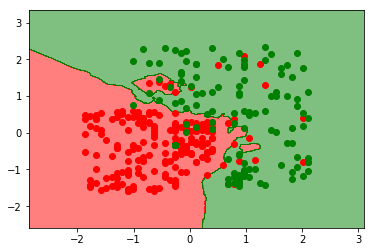

In [37]:
# Visualize the results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(np.min(X_train[:,0])-1, np.max(X_train[:,0])+1, 0.01), np.arange(np.min(X_train[:,1])-1, np.max(X_train[:,1])+1, 0.01))
# Create grid to preparing plot the background
plt.contourf(X1, X2, kn_clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.5, cmap=ListedColormap(('Red', 'Green')))

for i,j in enumerate(np.unique(y_test)):
    plt.scatter(X_set[np.where(y_set==i),0], X_set[np.where(y_set==i),1], c=ListedColormap(('Red', 'Green'))(i))

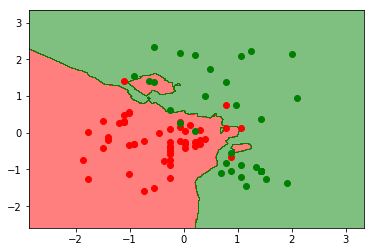

In [38]:
# Visualize the testing results
X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(X_set[:,0].min()-1, X_set[:,1].max()+1, 0.01), np.arange(X_set[:,1].min()-1, X_set[:,1].max()+1, 0.01))
plt.contourf(X1, X2, kn_clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.5, cmap=ListedColormap(('Red', 'Green')))

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[np.where(y_set==i),0], X_set[np.where(y_set==i), 1], c=ListedColormap(('Red','Green'))(i))